# Vorlage zu Aufgabenblatt 7 - Aufgabe 2: 
### Daten für ein strukturiertes Gitter

Die folgende Funktion erzeugt für das Einheitsquadrat $(0,1)^2 \subset \mathbb R^2$ ein strukturiertes Dreiecksgitter mit Gitterweite  $h=\frac{1}{n-1}$ . Das Gitter besteht aus $M=n^2$ Knoten und $N=2(n-1)^2$ Dreiecken. Zurückgeliefert werden:
 * ein Array `vtrs`  von Koordinaten der Form $\mathbb R^{M \times 2}$, wobei `vtrs(j,1)` und `vtrs(j,2)` die $x-$ bzw. $y-$Koordinate des j-ten Vertex sind.
 
 * ein Array `tris` von Dreiecksindizes der Form $\mathbb N^{N \times 3}$, wobei `vrts(tris(i,1))`, `vrts(tris(i,2))` und `vrts(tris(i,3))` die Koordinaten der Eckknoten des i-ten Dreiecks sind.
 
* ein Array `vrtMarks` von Markierungen der Form $\mathbb N_0^M$, wobei `vrtMarks(i) == 0`, falls das i-te Vertex ein innerer Knoten ist und `vrtMarks(i) == 1`, falls das i-te Vertex ein Randknoten ist.

In [1]:
function [vrts, tris, vrtMarks] = CreateStructureGrid(n)
    # Create triangles
    tris = [];
    for j=1:n-1
        for i=1:n-1
            tris = [tris; [(j-1)*n+i (j-1)*n+(i+1)  j*n+(i+1)]];
            tris = [tris;[(j-1)*n+i j*n+(i+1) j*n+i]];
        endfor 
    endfor
    
    # Dirichlet marks
    dirichlet = zeros(n*n,1);
    
    # Create positions
    h = 1.0/(n-1)
    vrts=[];
    ind = 1
    for j=0:n-1
        for i=0:n-1
           vrts = [vrts; [i*h j*h]];
           if ((i==0) || (j==0) || (i+1==n) || (j+1==n))  
           vrtMarks(ind)=1;
           end
           ind = ind+1;
        endfor 
    endfor
endfunction


Dies können wir nun auch visualisieren:

h =  0.33333
ind =  1
vertices =

   0.00000   0.00000
   0.33333   0.00000
   0.66667   0.00000
   1.00000   0.00000
   0.00000   0.33333
   0.33333   0.33333
   0.66667   0.33333
   1.00000   0.33333
   0.00000   0.66667
   0.33333   0.66667
   0.66667   0.66667
   1.00000   0.66667
   0.00000   1.00000
   0.33333   1.00000
   0.66667   1.00000
   1.00000   1.00000

elements =

    1    2    6
    1    6    5
    2    3    7
    2    7    6
    3    4    8
    3    8    7
    5    6   10
    5   10    9
    6    7   11
    6   11   10
    7    8   12
    7   12   11
    9   10   14
    9   14   13
   10   11   15
   10   15   14
   11   12   16
   11   16   15

marks =

   1   1   1   1   1   0   0   1   1   0   0   1   1   1   1   1

dirichletInd =

    1    2    3    4    5    8    9   12   13   14   15   16



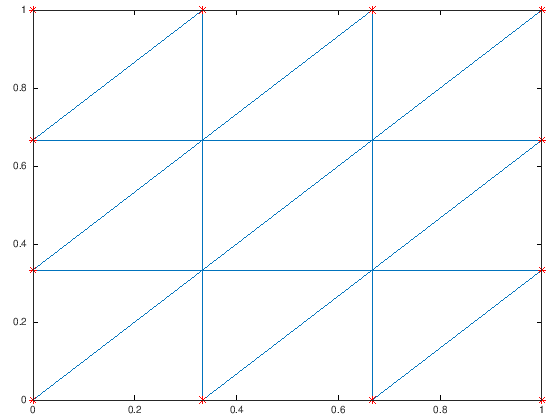

In [11]:
[vertices, elements, marks] = CreateStructureGrid(4)
triplot (elements, vertices(:,1), vertices(:,2));
hold on;

dirichletInd=find(marks==1)
plot (vertices(dirichletInd,1), vertices(dirichletInd,2), "r*");


### Darstellung der einer Hutfunktion
Das Gitter ist dabei lexikografisch angeordnet. Es folgt die Darstellung der Hutfunktion $\Phi_{\alpha}$ zum Index $\alpha=11$. Offenbar verschwindet die Funktion auf allen Elementen, für die $\vec v_{11}= (2/3, 2/3)^T$ kein Eckpunkt ist:

u =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1
   0
   0
   0
   0
   0



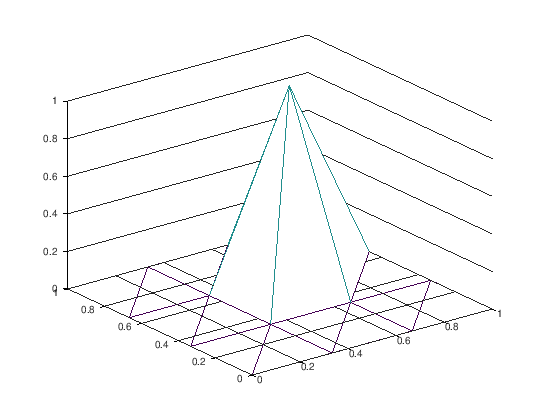

In [3]:
u = zeros(size(vertices)(1),1);
alpha = 11;
u(alpha) = 1
trimesh(elements,vertices(:,1),vertices(:,2), u(:));

## Diskretisierung
**Aufgabenteile 2a)-b)**: Vervollständigen Sie für  folgende Funktion:

In [ ]:
function A=AssembleMatrix(elements, positions)
NumVtx = size(positions)(1)
numT = size(tri)
A = zeros(NumVtx, NumVtx);


# Iterate over elements
for i=1:numT

    # Get nodes and positions for i-th element.
    indT = ...
    posT = ...

    # Compute transformation Bt.
    Bt = ...
    detT = abs(det(Bt));
    areaRef = 0.5;
     
    # Gradients of hat functions. 
    grads(1,:) = ...
    grads(2,:) = ...
    grads(3,:) = ...
    
    # grads # debug info

    # Local stiffness matrix
    for alpha=1:3
         for beta=1:3
             Aelem(beta,alpha) = ...
             A(indT(beta), indT(alpha) ) += Aelem(beta,alpha);
         end
     end

end

endfunction


Jetzt können wir die Matrix assemblieren:

In [4]:
A=AssembleMatrix(elements, vertices)
A(5,:)

NumVtx =  16
numT =

   18    3

A =

 Columns 1 through 8:

   1.00000  -0.50000   0.00000   0.00000  -0.50000   0.00000   0.00000   0.00000
  -0.50000   2.00000  -0.50000   0.00000   0.00000  -1.00000   0.00000   0.00000
   0.00000  -0.50000   2.00000  -0.50000   0.00000   0.00000  -1.00000   0.00000
   0.00000   0.00000  -0.50000   1.00000   0.00000   0.00000   0.00000  -0.50000
  -0.50000   0.00000   0.00000   0.00000   2.00000  -1.00000   0.00000   0.00000
   0.00000  -1.00000   0.00000   0.00000  -1.00000   4.00000  -1.00000   0.00000
   0.00000   0.00000  -1.00000   0.00000   0.00000  -1.00000   4.00000  -1.00000
   0.00000   0.00000   0.00000  -0.50000   0.00000   0.00000  -1.00000   2.00000
   0.00000   0.00000   0.00000   0.00000  -0.50000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -1.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -1.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.000

**Aufgabenteile 2c)**: Vervollständigen Sie folgende Funktion:

In [ ]:
function [A, b] = SetDirichletValues(A, bndIndices, vertices)
    b = ...
    n = size(bndIndices(:))
    for i=1:n
        alpha = bndIndices(i)
        A(alpha, :) = ...
        A(alpha, alpha) = ...
        b(alpha,1) = ...
    endfor
endfunction

**Aufgabenteile 2d)**: Testen Sie Ihr Ergebnis. Lösen Sie zunächst das lineare Gleichungssystem:

In [16]:
[A, b] = SetDirichletValues(A, dirichletInd, vertices);
b
u = linsolve(A,b)

n =

   12    1

alpha =  1
b =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

alpha =  2
b =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

alpha =  3
b =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

alpha =  4
b =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

alpha =  5
b =

   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

alpha =  8
b =

   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.33333
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000

alpha =  9
b =

   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.33333
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000

alpha =  12
b =

   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.00000
   0.33333
   0.00

Stellen Sie dann die Lösung graphisch dar:

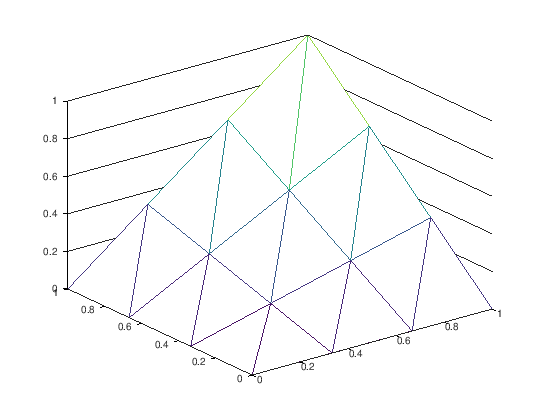

In [17]:
trimesh(elements,vertices(:,1),vertices(:,2), u(:));